# Eval Output Data

In [1]:
import pypsa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.font_manager
import seaborn as sns

## Relevant output parameter for evaluation

- p_nom_opt : optimal nominal power in generators
- p         : actual power input at t in generators_t
- lcoe      : levelized cost (invest + operation)

## Collect capacity factor and generation share of models and time periods

In [2]:
# basedir = '/gws/pw/j05/cop26_hackathons/oxford/Group_folders/group_5/data/schlott_material'
# model = 'ICHEC'
# modeldir = os.path.join(basedir, model)
# cap_share_all = None
# gen_share_all = None
# gen_share_per_node_all = None
# for period in os.listdir(modeldir):
#         print("collect data of model {} for period {}".format(model, period))
#         network_d = os.path.join(modeldir,period)
#         network = pypsa.Network(network_d)
#         ### capacity/generation shares
#         cap_share = network.generators.p_nom_opt.groupby(network.generators.carrier).sum() # per carrier
#         gen_share = network.generators_t.p.groupby(network.generators.carrier, axis=1).sum().sum() # per carrier
#         gen_share_per_node = network.generators_t.p.groupby([network.generators.bus, network.generators.carrier], axis=1).sum().sum() # per carrier and bus
#         if cap_share_all is None:
#                 cap_share_all = pd.DataFrame(index=cap_share.index)
#                 gen_share_all = pd.DataFrame(index=gen_share.index)
#                 gen_share_per_node_all = pd.DataFrame(index=gen_share_per_node.index)
#         cap_share_all[period] = cap_share
#         gen_share_all[period] = gen_share
#         gen_share_per_node_all[period] = gen_share_per_node
        
        
        

# cap_share_all.to_csv("cap_share_all_periods_model_{}.csv".format(model))
# gen_share_all.to_csv("gen_share_all_periods_model_{}.csv".format(model))
# gen_share__per_node_all.to_csv("gen_share_per_node_all_periods_model_{}.csv".format(model))


## Collect LCOE of models and time periods

In [ ]:
# basedir = '/gws/pw/j05/cop26_hackathons/oxford/Group_folders/group_5/data/schlott_material'
# for model in ['ICHEC','CNRM','MPI']:
#     modeldir = os.path.join(basedir, model)
#     lcoe_all = None
#     lcoe_per_carrier_all = None
#     lcoe_per_carrier_and_node_all = None
#     for period in os.listdir(modeldir):
#         print("collect data of model {} for period {}".format(model, period))
#         network_d = os.path.join(modeldir,period)
#         network = pypsa.Network(network_d)

#         ### levelized cost of electricity
#         investments = network.generators.p_nom_opt * network.generators.capital_cost
#         operation = network.generators_t.p.sum() * network.generators.marginal_cost

#         generation_per_carrier = network.generators_t.p.groupby(network.generators.carrier,axis=1).sum()
#         operation_per_carrier = operation.groupby(network.generators.carrier).sum()
#         investments_per_carrier = investments.groupby(network.generators.carrier).sum()

#         generation_per_carrier_and_node = network.generators_t.p.groupby([network.generators.bus, network.generators.carrier],axis=1).sum()
#         operation_per_carrier_and_node = operation.groupby([network.generators.bus, network.generators.carrier]).sum()
#         investments_per_carrier_and_node = investments.groupby([network.generators.bus, network.generators.carrier]).sum()

#         lcoe = (investments.sum() + operation.sum()) / network.loads_t.p_set.sum().sum() # for whole system
#         lcoe_per_carrier = (investments_per_carrier.sum() + operation_per_carrier.sum()) / generation_per_carrier.sum() # per carrier
#         lcoe_per_carrier_and_node = ((investments_per_carrier_and_node.sum() + operation_per_carrier_and_node.sum()) / 
#                             generation_per_carrier_and_node.sum()) # per carrier and bus

#         if lcoe_all is None:
#             lcoe_all = pd.DataFrame(index=['lcoe'])
#             lcoe_per_carrier_all = pd.DataFrame(index=lcoe_per_carrier.index)
#             lcoe_per_carrier_and_node_all = pd.DataFrame(index=lcoe_per_carrier_and_node.index)

#         lcoe_all[period] = lcoe
#         lcoe_per_carrier_all[period] = lcoe_per_carrier
#         lcoe_per_carrier_and_node_all[period] = lcoe_per_carrier_and_node
    
#     lcoe_all.to_csv("lcoe_all_periods_model_{}.csv".format(model))
#     lcoe_per_carrier_all.to_csv("lceo_per_carrier_all_periods_model_{}.csv".format(model))
#     lcoe_per_carrier_and_node_all.to_csv("lceo_per_carrier_per_node_all_periods_model_{}.csv".format(model))

## Plot capacity and generation share for time periods and models

- use normalized difference 

\begin{equation}
    val = (x - x_{ref}) / x_{ref}
\end{equation}

- plot relatively to period 1970-1976

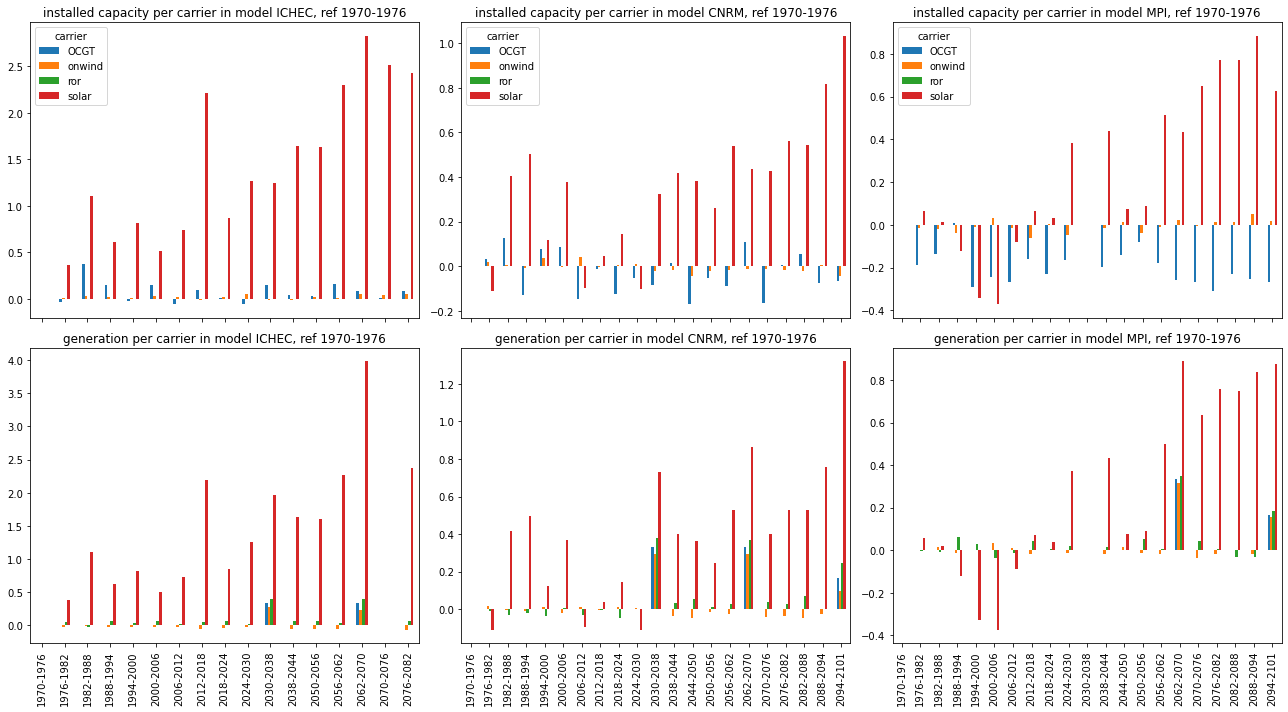

In [15]:
models = ['ICHEC','CNRM','MPI']
cap_share_dict = {model:[] for model in models}
gen_share_dict ={model:{"per_carrier":[], "per_carrier_per_node":[]} for model in models}
gen_share_dict ={model:{} for model in models}
fig,ax = plt.subplots(2,3,figsize=(18,10))
ref_period = "1970-1976"
for i, model in enumerate(models):
    cap_share_csv = 'data/cap_share_all_periods_model_{}.csv'.format(model)
    gen_share_csv = 'data/gen_share_all_periods_model_{}.csv'.format(model)
    gen_share_per_node_csv = 'data/gen_share_per_node_all_periods_model_{}.csv'.format(model)

    cap_share_all = pd.read_csv(cap_share_csv, index_col=0)
    gen_share_all = pd.read_csv(gen_share_csv, index_col=0)
    gen_share_per_node_all = pd.read_csv(gen_share_per_node_csv, index_col=[0,1])

    cap_share_rel = cap_share_all.copy()
    gen_share_rel = gen_share_all.copy()
    for c in cap_share_all.index:
        # compute normalized difference 
        cap_share_rel.loc[c] = (cap_share_rel.loc[c] - cap_share_all.loc[c][ref_period])/cap_share_all.loc[c][ref_period]
        gen_share_rel.loc[c] = (gen_share_rel.loc[c] - gen_share_all.loc[c][ref_period])/gen_share_all.loc[c][ref_period]
    cap_share_dict[model] = cap_share_all.copy()
    gen_share_dict[model]["per_carrier"] = gen_share_all.copy()
    gen_share_dict[model]["per_carrier_per_node"] = gen_share_per_node_all.copy()
    cap_share_rel.drop(index='offwind', inplace=True)
    cap_share_rel.T.plot.bar(ax=ax[0][i], rot=90)
    ax[0][i].set_title('installed capacity per carrier in model {}, ref {}'.format(model, ref_period))
    ax[0][i].set_xticklabels([])
    gen_share_rel.drop(index='offwind', inplace=True)
    gen_share_rel.T.plot.bar(ax=ax[1][i], rot=90, legend=False)
    ax[1][i].set_title('generation per carrier in model {}, ref {}'.format(model, ref_period))
fig.tight_layout()

In [16]:
fig.savefig("figs/capacity_and_generation_share_per_carrier_all_models_v2.png", bbox_inches='tight')

### Drop offwind in LCOE as generation of offwind is small compared to other carriers

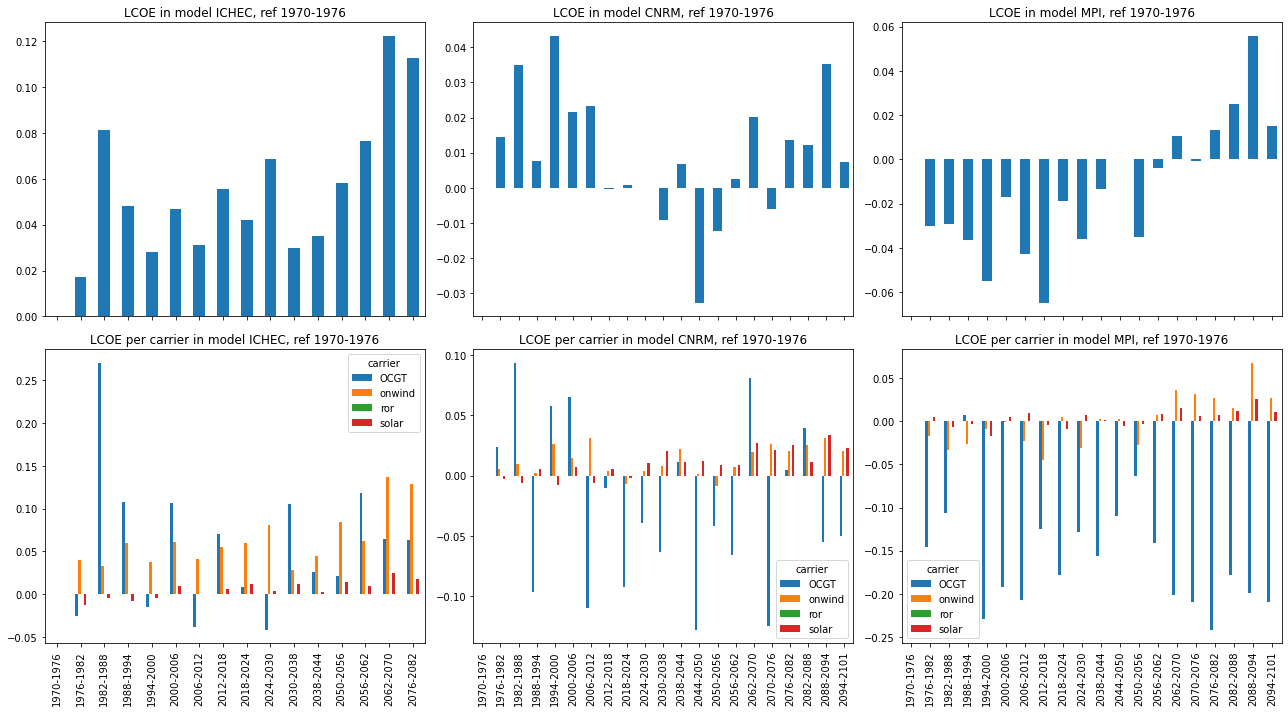

In [12]:
fig,ax = plt.subplots(2,3,figsize=(18,10))
ref_period = "1970-1976"
for i, model in enumerate(['ICHEC','CNRM','MPI']):
    lcoe_csv = 'data/lcoe_all_periods_model_{}.csv'.format(model)
    lcoe_per_carrier_csv = 'data/lceo_per_carrier_all_periods_model_{}.csv'.format(model)
    lcoe_per_carrier_per_node_csv = 'data/lceo_per_carrier_per_node_all_periods_model_{}.csv'.format(model)
    
    lcoe = pd.read_csv(lcoe_csv, index_col=0)
    lcoe_per_carrier = pd.read_csv(lcoe_per_carrier_csv, index_col=0)
    lcoe_per_carrier_per_node = pd.read_csv(lcoe_per_carrier_per_node_csv, index_col=[0,1])
    
    lcoe_per_carrier = lcoe_per_carrier.drop(index='offwind')
    
    lcoe_rel = (lcoe.loc['lcoe'] - lcoe.loc['lcoe'][ref_period])/lcoe.loc['lcoe'][ref_period]
    lcoe_per_carrier_rel = lcoe_per_carrier.copy()
    for c in lcoe_per_carrier.index:
        # compute normalized difference 
        lcoe_per_carrier_rel.loc[c] = (lcoe_per_carrier_rel.loc[c] - lcoe_per_carrier.loc[c][ref_period])/lcoe_per_carrier.loc[c][ref_period]

    lcoe_rel.T.plot.bar(ax=ax[0][i], rot=90)
    ax[0][i].set_title('LCOE in model {}, ref {}'.format(model, ref_period))
    ax[0][i].set_xticklabels([])
    lcoe_per_carrier_rel.T.plot.bar(ax=ax[1][i], rot=90, legend=True)
    ax[1][i].set_title('LCOE per carrier in model {}, ref {}'.format(model, ref_period))
fig.tight_layout()

In [13]:
fig.savefig("figs/lcoe_all_models.png", bbox_inches='tight')

# Plot Europe maps

In [113]:
# datadir = '/home/users/train061/group_folder/data/'
datadir = '/gws/pw/j05/cop26_hackathons/oxford/Group_folders/group_5/data/'
model = 'ICHEC'
period = '1970-1976'

network_d = datadir+'schlott_material/{}/{}'.format(model, period)

network = pypsa.Network(network_d)

Importing PyPSA from older version of PyPSA than current version 0.17.1.
Please read the release notes at https://pypsa.org/doc/release_notes.html
carefully to prepare your network for import.

/home/users/train027/.conda/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/home/users/train027/.conda/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network 1970-1976 has buses, carriers, generators, links, loads, storage_units


# Bruno's starting ideas

In [135]:
# datadir = '/home/users/train061/group_folder/data/'
datadir = '/gws/pw/j05/cop26_hackathons/oxford/Group_folders/group_5/data/'
model = 'ICHEC'
period = '1970-1976'

In [136]:
network_d = datadir+'schlott_material/{}/{}'.format(model, period)

network = pypsa.Network(network_d)

Importing PyPSA from older version of PyPSA than current version 0.17.1.
Please read the release notes at https://pypsa.org/doc/release_notes.html
carefully to prepare your network for import.

/home/users/train027/.conda/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/home/users/train027/.conda/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network 1970-1976 has buses, carriers, generators, links, loads, storage_units


## Features
Recommendation: Try to investigate measures which can be expressed as a function of the climate period (and potentially the node/carriers). Then, time series can be plotted and compared, similar periods can be identified, measures can be plotted against each other (scatter plots) to identify dependencies.

### Met Input Data

In [137]:
### average capacity factors for resources wind (onwind + offwind), solar PV (solar) and runoff river (ror)

n_timesteps = len(network.snapshots)
n_generators_per_carrier = pd.Series({carrier: len(network.generators.index[network.generators.carrier==carrier])
                                     for carrier in ['onwind', 'offwind', 'solar', 'ror']})

avg_capacity_factor = network.generators_t.p_max_pu.mean() # per generator

avg_capacity_factor_per_carrier = (network.generators_t.p_max_pu.groupby(network.generators.carrier, axis=1).sum().sum()/
                                   (n_timesteps*n_generators_per_carrier)) # per carrier

avg_capacity_factor_per_carrier_and_node = network.generators_t.p_max_pu.groupby([network.generators.bus, network.generators.carrier], 
                                                                                 axis=1).sum().sum()/n_timesteps # per carrier and bus

In [138]:
### low-generation events (minimum power availability from VRES over a period of 2-4 days, see Kies_etal)
vregens = network.generators.index[network.generators.carrier.isin(['onwind','offwind','solar'])]
available_p = network.generators_t.p_max_pu[vregens].sum(axis=1)

minimum_p_available_pu = pd.Series({n_days: (available_p.rolling('{}D'.format(n_days)).sum()/(len(vregens)*n_days*8)).min()
                                    for n_days in range(2,5)})

In [139]:
### complementarity as described in .pptx in group folder
### for further complementarity indices see Jurasz_etal

complementarity_seasonal = pd.read_csv(datadir+'complementarity/{}/{}/seasonal.csv'.format(model, period), header=0, index_col=0) # only NaNs => Bruno

In [140]:
### ramp rates (see Kies_etal)
### correlation lengths (see Schlott_etal)

### Simulation Outputs

In [141]:
### capacity/generation shares
cap_share = network.generators.p_nom_opt.groupby(network.generators.carrier).sum() # per carrier

gen_share = network.generators_t.p.groupby(network.generators.carrier, axis=1).sum().sum() # per carrier
gen_share_per_node = network.generators_t.p.groupby([network.generators.bus, network.generators.carrier], axis=1).sum().sum() # per carrier and bus

In [142]:
### levelized cost of electricity
investments = network.generators.p_nom_opt * network.generators.capital_cost
operation = network.generators_t.p.sum() * network.generators.marginal_cost

generation_per_carrier = network.generators_t.p.groupby(network.generators.carrier,axis=1).sum()
operation_per_carrier = operation.groupby(network.generators.carrier).sum()
investments_per_carrier = investments.groupby(network.generators.carrier).sum()

generation_per_carrier_and_node = network.generators_t.p.groupby([network.generators.bus, network.generators.carrier],axis=1).sum()
operation_per_carrier_and_node = operation.groupby([network.generators.bus, network.generators.carrier]).sum()
investments_per_carrier_and_node = investments.groupby([network.generators.bus, network.generators.carrier]).sum()

lcoe = (investments.sum() + operation.sum()) / network.loads_t.p_set.sum().sum() # for whole system
lcoe_per_carrier = (investments_per_carrier.sum() + operation_per_carrier.sum()) / generation_per_carrier.sum() # per carrier
lcoe_per_carrier_and_node = ((investments_per_carrier_and_node.sum() + operation_per_carrier_and_node.sum()) / 
                    generation_per_carrier_and_node.sum()) # per carrier and bus